In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
#import sklearn

df = pd.read_csv('loans_full_schema.csv')
df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


#1 250-500 words explain what ML is and when to use it, and when not to.

Machine Learning(ML) is(broadly) a type of algorithm that makes predictions/creates an output, from within a 'black box', based on input 'features' or variables that relate to that output. Essentially ML algoriths take an input of a lot of data and finds patterns within it. There are many domains of machine learning algorithms, and they can be used in different ways for different tasks. Thought multiple types of ML algorithms can be used for the same task, usually there is a best model type for whatever the task it is being for. Machine learning can be classified into 3 main domains, with many variants within each domain. Supervised learning, Unsupervised learning, and reinforcement learning. Supervised learning is the most farmiliar form of ML for most people; a dataset is stripped of a certain category of data, then the ML algorithm tries to find paterns within that dataset, and predict the outcome of the stripped part of the data. Then the ML algorithm is graded based on it's accuracy by comparing it's predictions to the correct results of the data. Unsupervised ML algorithms operate similarly* but there is no defined set of correct answers to compare the results, and the algorithm isn't looking for a specific outcome, it is just finding patterns in data. Both of these types of ML can be further broken down into 4 categories: dimentionality reduction & clustering for unsupervised learning, regression & classification for supervised learning. These categories are largely used for either discrete datasets, or continuous datasets repectively. Reinforcement learnign is something that I comparitively know very little about, but I will give a short description. Reinforcement learning algorithms generally have control over something, the algorithm then randomly tries different actions within it's control, and it is either rewarded or punished for this action. There is generally a goal with these algorithms, though generally that goal is to simply complete a task. (I think Boston Dynamics might employ this in their robots? but I'm not sure about that.)

There are lots of problems that you could employ a ML algorithm to solve, and they often are used by groups with lots of resources to solve probelms. Machine learning algorithms require A LOT of resurces to run, namely data. Without incrediblly large datasets, ML algorithms are limited in their capacities. If you do have a lot of data though, they are very good at a lot of things, and (witht he right knowledge and expertise) can be applied to almost any problem in which you have a lot of data.

#2 Pre-Proccessing:
Name 3 different techniques that you will be using in this markdown, then implement in the code cell below

techniques:

ONE HOT ENCODING
split [homownership, initial_listing_status, verified_income, disbursement_method] into two columns. Get.dummies  (we can also do this manually)
Or assign arbitrary values '0' & '1' & '2' ect.... df.map or label encoder. map is preffered
Or for [initial_listing_status, disbursement_method] we can use boolean indexing since they are binary, same for [verified_income] if secured source = verified source

Create a df that lacks the joint columns, they aren't neccesary.
Or bool index them as False for NaN & True for else.
Or create a seperate df that is boolean sorted & keep the original

Subgrade is ordinal so we should be able to covnert to a value, assuming that A is the highest. we can put them in bins/empty lits depending on what 
letter they have. Then perform an operation on that list/df based on what letter it represents. EX: listA n  i*10^0, listB i*10^-1 ect... 
Thic could be automated and formated so that it is i*10^0-(ordinal letter), but manual is easier. 

Dealing with null: KNN could fill in nulls for emp_title ect... but I dont think that idea is helpful.
besides that, for this data there aren't any nulls in anything other than the joint_columns, which are dropped.



This is just a get_dummies function that I would apply to [homownership, initial_listing_status, verified_income, disbursement_method].

Doing it to so many columns may be an issue, but I see no good solution besides this.

This is a use of One-Hot Encoding

In [8]:
#2, code

def get_dummies(DATAFRAME,COLUMN): #This is just a get_dummies function, I am using it on 
    #[homownership, initial_listing_status, verified_income, disbursement_method]
    # This type of pre-prroccessing is called one-hot encoding
    """replaces column with the split version"""
    filler_df= pd.get_dummies(DATAFRAME[COLUMN])
    
    columns = list(filler_df.columns)
    
    for _ in columns:
    
        j = 0
        
        DATAFRAME.insert((DATAFRAME.columns.get_loc(COLUMN))+j,_,filler_df[_])
    
        j=+1
    
    DATAFRAME = DATAFRAME.drop(COLUMN, axis = 'columns')
    
    return DATAFRAME

get_dummies(df,'verified_income')

,emp_title,emp_length,state,homeownership,annual_income,Not Verified,Source Verified,Verified,debt_to_income,annual_income_joint,...,whole,initial_listing_status,Cash,DirectPay,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,False,False,True,18.01,NaN,...,True,whole,True,False,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,True,False,False,5.04,NaN,...,True,whole,True,False,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,False,True,False,21.15,NaN,...,False,fractional,True,False,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,True,False,False,10.16,NaN,...,True,whole,True,False,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,False,False,True,57.96,57000.0,...,True,whole,True,False,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,False,True,False,22.28,NaN,...,True,whole,True,False,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,False,False,True,32.38,NaN,...,True,whole,True,False,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,False,False,True,45.26,107000.0,...,False,fractional,True,False,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,False,True,False,11.99,NaN,...,True,whole,True,False,Cash,21518.12,2873.31,2481.88,391.43,0.0


This function turns sub_grade into integers. 

This function for converting ordinal values to int isn't very applicaple elsewhere, but with light modifications this function should be able to do any
ordinal value that is of the format 'A-Z''int'.

Im not sure what this kind of pre-processing is called

In [9]:
#2, code

def sub_grade_reverse(DATAFRAME,COLUMN): # This is converting the sub_grade column into int, LOWER IS BETTER
    #sub_grade is ordinal so this was simple enough
    #I'm not sure what you would call this kind of pre-proccessing

    alphabet = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',' ','$',',']
        
    i = 0
        
    while i < 29:
        DATAFRAME[COLUMN] = np.where(DATAFRAME[COLUMN].str.contains(alphabet[i]), DATAFRAME[COLUMN].str.replace(alphabet[i], str(i)), DATAFRAME[COLUMN])
            
        i += 1

    DATAFRAME[COLUMN] = [int(x) for x in DATAFRAME[COLUMN]]
    
    return DATAFRAME[COLUMN]

sub_grade_reverse(df,'sub_grade')

0       23
1       21
2       31
3        3
4       23
        ..
9995     4
9996    33
9997    42
9998     1
9999    14
Name: sub_grade, Length: 10000, dtype: int64

I though about making these functions, but it is literally built-in. I would change this if I though I would lose the extra credit points.

The first line is just dropping joint_columns, With such a high volume of null values, I'm not sure how valuble they are. 
I copied the original df so that you can still use the data.

The second function first saves the df, then turns the joint_columns into a binary. This on its own isnt super useful, 
but you could use it to make a new df of only married/joint loan applicants by making a new df of only those rows, then re-assign the values into that new df. Then you could drop these rows from the original df and compare the two.

In [11]:
#2

backup_df = df.copy()

df = df.drop(['annual_income_joint','verification_income_joint','debt_to_income_joint'],axis=1)

In [9]:
df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,...,whole,initial_listing_status,Cash,DirectPay,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0,38.0,2001,...,True,whole,True,False,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,0,NaN,1996,...,True,whole,True,False,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,0,28.0,2006,...,False,fractional,True,False,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,0,NaN,2007,...,True,whole,True,False,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,0,NaN,2008,...,True,whole,True,False,Cash,21430.15,2324.65,1569.85,754.80,0.0


#3 create a correlation matrix, and a heatmap. Then write about the takeaways from the matrix.

Then use it to select max 10 feature for the ML model

Here are the best 'features' to use for a predictive model that predicts if someone will pay back their loan:

OWN                     0.013291 

annual_income           0.011982

earliest_credit_line    0.010356

total_credit_lines     0.018615  

accounts_opened_24m    0.037957

fractional             0.058835

all of these are horrible, but I find it unlikley that there are no features with any correlation, so I am assuming there is some issue comparing the data( Maybe a nonlinear relationshp?)



In [12]:
# I am droping non-numbers, I was making a function to do this, 
#and I will likely still need to do that in the future, but that took a painful amount of effort. And it still doesnt work
numbers_df = df.drop(['emp_title','verified_income','state','homeownership','disbursement_method','initial_listing_status'
                      ,'loan_status','issue_month','grade','loan_purpose','application_type',],axis=1)

numbers_df['loan_percent'] = numbers_df['paid_total']/numbers_df['loan_amount'] #how successful someone has been in paying back the loan

numbers_df.corr()

,emp_length,annual_income,Not Verified,Source Verified,Verified,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,...,fractional,whole,Cash,DirectPay,balance,paid_total,paid_principal,paid_interest,paid_late_fees,loan_percent
emp_length,1.000000,0.096469,0.011419,-0.046594,0.042853,0.026157,0.008242,0.028790,-0.234408,0.003753,...,-0.021200,0.021200,0.032883,-0.032883,0.086768,0.024246,0.018153,0.049517,0.001851,-0.015621
annual_income,0.096469,1.000000,-0.045089,0.062093,-0.021234,-0.180445,0.052236,-0.040392,-0.156001,0.090119,...,-0.050766,0.050766,-0.011331,0.011331,0.280170,0.162005,0.141893,0.174154,-0.005318,0.011982
Not Verified,0.011419,-0.045089,1.000000,-0.626465,-0.408212,-0.027511,-0.013202,0.030370,-0.059494,-0.093326,...,-0.000415,0.000415,0.001075,-0.001075,-0.189716,-0.087302,-0.060405,-0.214318,-0.026833,0.001397
Source Verified,-0.046594,0.062093,-0.626465,1.000000,-0.455818,-0.101711,0.008009,-0.018387,0.071904,0.053024,...,-0.006043,0.006043,-0.036486,0.036486,0.054777,0.032298,0.026870,0.045305,0.015550,-0.005173
Verified,0.042853,-0.021234,-0.408212,-0.455818,1.000000,0.150472,0.005695,-0.012924,-0.016276,0.044470,...,0.007551,-0.007551,0.041505,-0.041505,0.152487,0.061865,0.037508,0.191675,0.012428,0.004464
debt_to_income,0.026157,-0.180445,-0.027511,-0.101711,0.150472,1.000000,-0.027517,0.034637,-0.089700,0.025388,...,0.009070,-0.009070,-0.008639,0.008639,0.065996,-0.003918,-0.020116,0.121160,-0.010110,-0.031533
delinq_2y,0.008242,0.052236,-0.013202,0.008009,0.005695,-0.027517,1.000000,-0.566551,-0.078109,0.003152,...,0.032595,-0.032595,0.025903,-0.025903,-0.031440,-0.004490,-0.006857,0.017165,-0.009404,0.002016
months_since_last_delinq,0.028790,-0.040392,0.030370,-0.018387,-0.012924,0.034637,-0.566551,1.000000,0.030064,0.022727,...,0.003837,-0.003837,-0.028153,0.028153,0.036517,-0.017350,-0.016431,-0.009362,0.005123,-0.029832
earliest_credit_line,-0.234408,-0.156001,-0.059494,0.071904,-0.016276,-0.089700,-0.078109,0.030064,1.000000,0.042745,...,0.024131,-0.024131,-0.013054,0.013054,-0.107508,-0.040281,-0.036125,-0.037027,0.020522,0.010356
inquiries_last_12m,0.003753,0.090119,-0.093326,0.053024,0.044470,0.025388,0.003152,0.022727,0.042745,1.000000,...,0.033946,-0.033946,0.018753,-0.018753,0.026550,0.032823,0.023155,0.077204,0.022404,0.029343


I could't read all the values for the matrix above, so I broke it down for legibility

In [12]:
print(numbers_df.corr())

                                  emp_length  annual_income  debt_to_income  \
emp_length                          1.000000       0.096469        0.026157   
annual_income                       0.096469       1.000000       -0.180445   
debt_to_income                      0.026157      -0.180445        1.000000   
delinq_2y                           0.008242       0.052236       -0.027517   
months_since_last_delinq            0.028790      -0.040392        0.034637   
earliest_credit_line               -0.234408      -0.156001       -0.089700   
inquiries_last_12m                  0.003753       0.090119        0.025388   
total_credit_lines                  0.133472       0.210163        0.198647   
open_credit_lines                   0.067415       0.176788        0.217078   
total_credit_limit                  0.147594       0.516703        0.075174   
total_credit_utilized               0.019694       0.406370        0.238155   
num_collections_last_12m           -0.015729      -0

This heat map isnt super useful as there are to many variables to get a clear piture of what is happening.

19x19 is the largest heatmap that data can be extrapolated from, though it still hints at where to look in the correlation matrix

<Axes: >

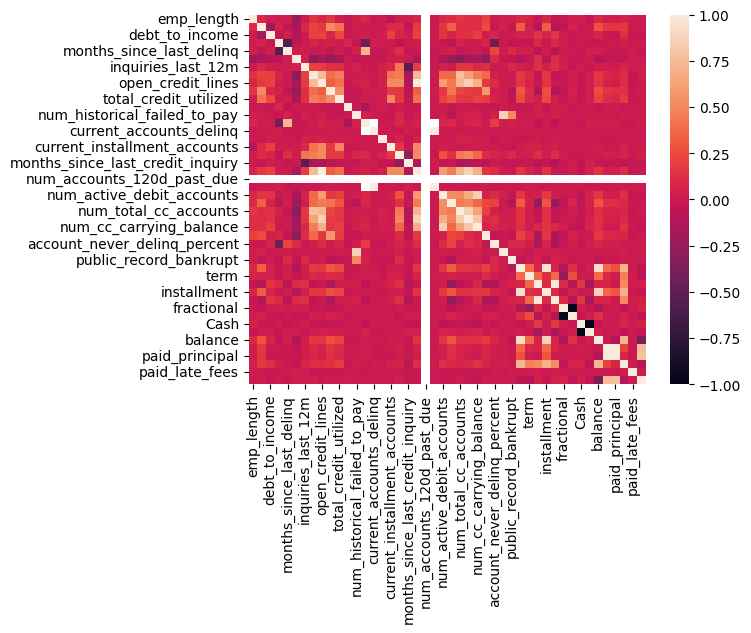

In [13]:
sns.heatmap(numbers_df.corr())

#4 make a box and whisker plot of the loan_amounts

How do you handle null value?

What do these plots show you?

I just dropped null values for this graph. There were relatively few, so I believe that this was a decent technique.

This graph shows that the median loan amount was around $14,000, though the normal range extended from 1,000-40,000

Text(0, 0.5, 'loan amount ($)')

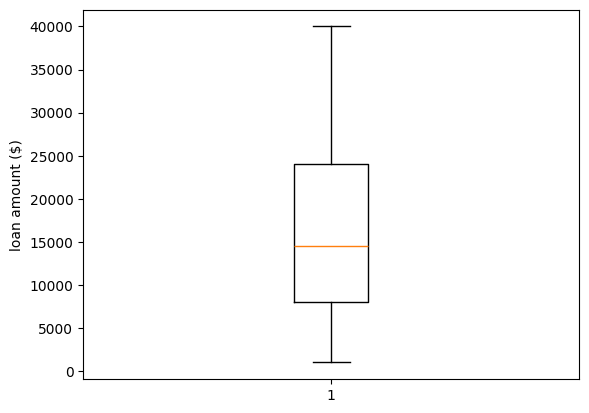

In [15]:
#4, code 
plt.boxplot(df['loan_amount'].dropna())
plt.ylabel('loan amount ($)')

#5 using a lambda function create a new column that divides where people live into Pacific, Plains, Midwest, Northeast, and South.

Create another lambda function/another function that does the same thing in a different way and use a timer to see which is better.

In [129]:
#5, code
start_time = time.time()

plains = ['MT','ND','SD', 'WY', 'NE', 'KS', 'CO','OK','NM']
pacific = ['CA','OR','WA','AK', 'HI','NV','AZ','ID']
midwest = ['IL','IN','IA','MI','MN','MO','OH','WI']
northeast = ['CT','ME','MA','NH','RI','VT','NY','NJ','PA','DE','MD']
south = ['AL','AR','FL','GA','KY','LA','MS','NC','SC','TN','TX','VA','WV']
states2 = [northeast,south,midwest,plains,pacific]

lambda_func = lambda state: ("plains" if state in plains else 
                             ('northeast' if state in northeast else ('pacific' if state  in pacific else ('midwest' if state in midwest
                                                                                                          else 'south' if state in south
                                                                                                          else 'LOOK HERE'))))
df['region'] = df['state'].apply(lambda_func)
df.head()

end_time = time.time()
elapsed_time = end_time - start_time
print(f'Time elapsed: {elapsed_time} seconds')

Time elapsed: 0.015621423721313477 seconds


This does the same thing but in a clearer way, bulkier and slower though

In [126]:
start_time = time.time()

def states_by_region(DATAFRAME,COLUMN):
    plains = ['MT','ND','SD', 'WY', 'NE', 'KS', 'CO','OK','NM']
    pacific = ['CA','OR','WA','AK', 'HI','NV','AZ','ID']
    midwest = ['IL','IN','IA','MI','MN','MO','OH','WI']
    northeast = ['CT','ME','MA','NH','RI','VT','NY','NJ','PA','DE','MD']
    south = ['AL','AR','FL','GA','KY','LA','MS','NC','SC','TN','TX','VA','WV']
    
    region_list = []
    
    tick = 0
    
    for i in DATAFRAME[COLUMN]:
        
        if i in plains:
            region_list.insert(tick,'plains')
        elif i in pacific:
            region_list.insert(tick,'pacific')
        elif i in midwest:
            region_list.insert(tick,'midwest')
        elif i in northeast:
            region_list.insert(tick,'northeast')
        elif i in south:
            region_list.insert(tick,'south')
        else:
            region_list.insert(tick,'LOOK HERE')
    
        tick=+1
    
    DATAFRAME['region'] = region_list
    
    return DATAFRAME.head()

states_by_region(df,'state')

end_time = time.time()
elapsed_time = end_time - start_time
print(f'Time elapsed: {elapsed_time} seconds')

Time elapsed: 0.04685616493225098 seconds


#6 Create a subplot histogram that shows if loan amounts differ by region

Explain findings in less than 200 words.

Text(0, 0.5, 'number of each loan value')

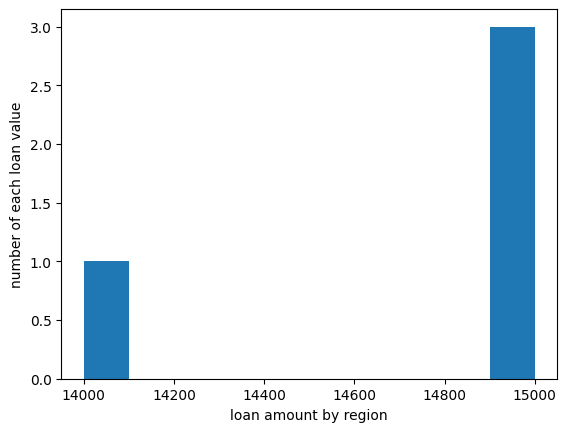

In [123]:
#6, code

plains_df = df[df['region'] == 'plains']
midwest_df = df[df['region'] == 'midwest']
northwest_df = df[df['region'] == 'northwest']
south_df = df[df['region'] == 'south']
pacific_df = df[df['region'] == 'pacific']

loan_by_region = [plains_df['loan_amount'].median(),
          midwest_df['loan_amount'].median(),
          northwest_df['loan_amount'].median(),
         south_df['loan_amount'].median(),
         pacific_df['loan_amount'].median()]

plt.hist(loan_by_region)
plt.xlabel('loan amount by region')
plt.ylabel('number of each loan value')

This histogram is horrible but I cannot find a way to make the y-axis the values, and the x-axis the bin labels. There is obviously a way to do this or it would be the worst plotting collection ever, but I cant find it. I also do not know why it somehow manages to only have 4 data points, despite me inputting 5, but I also cannot fix that either.

As for the findings, the loans are suprisingly similar be region. Of the 5 inputs, 3 are within $100 of eachother with only 1 outlier, and that outlier is still withing 1000 dollars of the rest. A box and whiskers plot could give us the the distribution of the data, if there is a skew we should use the mean value as opposed to the median for this comparison. As well, though this graph does not show it, the outlier is the 'south' region.

Week 7 quiz

I chose linear regression, I chose this because I am predicting a values between 0-1 'loan_percent' and the input data is continuous.

This approach gave poor results, though I believe that this might be more to do with the low correlation in the data, than with the apporach. As well, more preprccessing could be done to help find the best features for this model, Standardization is one type of preproccessing that this would defenitly benefit the model

In [14]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
corr_test = df[['fractional','accounts_opened_24m']]
corr_test.corr()

,fractional,accounts_opened_24m
fractional,1.000000,0.026511
accounts_opened_24m,0.026511,1.000000


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = np.array(numbers_df[['fractional','accounts_opened_24m']])

y = np.array(numbers_df['loan_percent'])

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.25,
                                                 random_state=30)

In [18]:
numbers_df.drop('paid_total',axis=1)

,emp_length,annual_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,...,sub_grade,fractional,whole,Cash,DirectPay,balance,paid_principal,paid_interest,paid_late_fees,loan_percent
0,3.0,90000.0,18.01,0,38.0,2001,6,28,10,70795,...,23,False,True,True,False,27015.86,984.14,1015.19,0.0,0.071405
1,10.0,40000.0,5.04,0,NaN,1996,1,30,14,28800,...,21,False,True,True,False,4651.37,348.63,150.49,0.0,0.099824
2,3.0,40000.0,21.15,0,28.0,2006,4,31,10,24193,...,31,True,False,True,False,1824.63,175.37,106.43,0.0,0.140900
3,1.0,30000.0,10.16,0,NaN,2007,0,4,4,25400,...,3,False,True,True,False,18853.26,2746.74,566.15,0.0,0.153375
4,10.0,35000.0,57.96,0,NaN,2008,7,22,16,69839,...,23,False,True,True,False,21430.15,1569.85,754.80,0.0,0.101072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10.0,108000.0,22.28,0,NaN,2008,5,44,13,199195,...,4,False,True,True,False,21586.34,2413.66,556.14,0.0,0.123742
9996,8.0,121000.0,32.38,4,9.0,1994,1,28,15,382061,...,33,False,True,True,False,9147.44,852.56,603.75,0.0,0.145631
9997,10.0,67000.0,45.26,2,6.0,2004,0,18,11,346402,...,42,True,False,True,False,27617.65,2382.35,2238.45,0.0,0.154027
9998,1.0,80000.0,11.99,0,NaN,1999,1,38,15,294475,...,1,False,True,True,False,21518.12,2481.88,391.43,0.0,0.119721


In [19]:
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression()

In [20]:
pred_value = regression_model.predict(X_test)
pred_value

array([0.14925835, 0.14925835, 0.18176434, ..., 0.18548246, 0.17804623,
       0.17618717])

In [21]:
accuracy = regression_model.score(X_test,y_test)
print(accuracy)

0.004243109181952698


# assignment 9

In [3]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip instlal scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "instlal" - maybe you meant "install"



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


C:\Users\Admin\AppData\Local\Temp\ipykernel_10296\3538350959.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
# So I am changing the measure of the model, 
#instead of the percent of the loan paid back, I am going to call a successful loan one that pays back the amount burrowed or more
# This is changing the buissness logic so it is kind of cheating, but I feel this isn't inherently secarilly an incorrect way to measure 
# the success of a loan.

In [13]:
numbers_df['months_since_last_delinq'] = numbers_df['months_since_last_delinq'].fillna(numbers_df['months_since_last_delinq'].max())
numbers_df['months_since_90d_late'] = numbers_df ['months_since_90d_late'].fillna(numbers_df['months_since_90d_late'].max())
numbers_df['emp_length'] = numbers_df['emp_length'].fillna(numbers_df['emp_length'].mean())
numbers_df['debt_to_income'] = numbers_df['debt_to_income'].fillna(numbers_df['debt_to_income'].mean())
numbers_df['months_since_last_credit_inquiry'] = numbers_df['months_since_last_credit_inquiry'].fillna(numbers_df['months_since_last_credit_inquiry'].max())
numbers_df['num_accounts_120d_past_due'] = numbers_df ['num_accounts_120d_past_due'].fillna(0)

This took a painful amount of time, but This deals with all null values. The logic on what I fill everythin with isn't the best; but I think this should work

In [14]:
#Success_func = lambda x: 1 if x == 0 else 0
#numbers_df['Success'] = numbers_df['balance'].apply(Success_func)
# This didn't work, dont know why

success_list = []

for i in numbers_df['balance']:
    if i == 0:
        success_list.append('1')
    else:
        success_list.append('0')

numbers_df['success'] = success_list


Then we are going to overfit the cases where they actually have paid back the loan (it is a very small percent)

In [203]:
x = numbers_df.drop('success',axis = 1)
y = numbers_df['success']


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state = 15,stratify =y)

In [43]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [208]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=17)
x_r,y_r = ros.fit_resample(x_train,y_train)

In [186]:
regression_model.fit(x_r,y_r)

LinearRegression()

In [189]:
regression_model.score(x_test,y_test)

-0.7489503728512368

Interesting

In [197]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_r1 = sc.fit_transform(np.array(x_r))

In [198]:
regression_model.fit(x_r1,y_r)


LinearRegression()

In [199]:
regression_model.score(x_test,y_test)

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


-3.5898703570234477e+25

I might have done something wrong

In [204]:
x_t = sc.fit_transform(x_train)
x_t1 = sc.fit_transform(x_test)

In [209]:
x_r,y_r = ros.fit_resample(x_t,y_train)

In [210]:
regression_model.fit(x_t,y_train)

LinearRegression()

In [211]:
regression_model.score(x_t1,y_test)

-2.489224484063022e+19

I just realized this is linear regression, let's try logistic regression

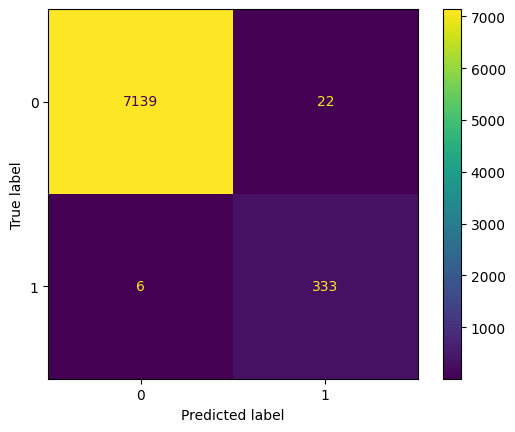

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def logisticregression(DATAFRAME,COLUMN):
    """Logistic regression code, plus some scaling"""

    y = DATAFRAME[COLUMN]
    X = DATAFRAME.drop(COLUMN,axis=1)




    X_train,X_test,y_train,y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.25,
                                                    random_state=15)

    #This just standardizes the data

    sc = StandardScaler() 
    X_train = sc.fit_transform(X_train) 
    X_test = sc.fit_transform(X_test)

    LogRegression = LogisticRegression(random_state=16).fit(X_train,y_train)

    return ConfusionMatrixDisplay.from_estimator(LogRegression,X_test,y_test)

logisticregression(numbers_df,'success')

In [215]:
#recall
295/(44+295)

0.8702064896755162

In [216]:
#precision
295/(18+295)

0.9424920127795527

Now with overscaling

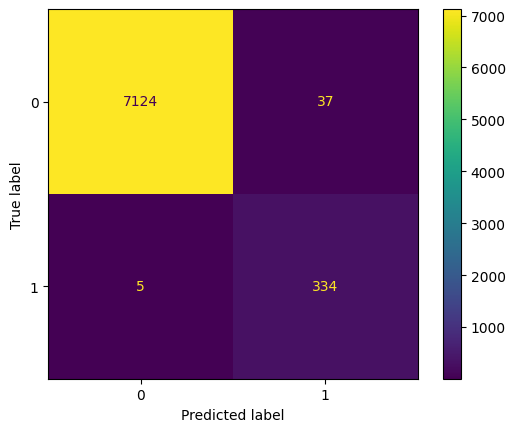

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler

def logisticregression(DATAFRAME,COLUMN):
    """Logistic regression code, plus some scaling"""

    y = DATAFRAME[COLUMN]
    X = DATAFRAME.drop(COLUMN,axis=1)




    X_train,X_test,y_train,y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.25,
                                                    random_state=15)

    #This just standardizes the data

    sc = StandardScaler() 
    X_train = sc.fit_transform(X_train) 
    X_test = sc.fit_transform(X_test)

    ros = RandomOverSampler(random_state=17)
    x_r,y_r = ros.fit_resample(X_train,y_train)

    

    LogRegression = LogisticRegression(random_state=16).fit(x_r,y_r)

    return ConfusionMatrixDisplay.from_estimator(LogRegression,X_test,y_test)

logisticregression(numbers_df,'success')

In [220]:
#recall
329/(10+329)

0.9705014749262537

In [221]:
#precision
329/(60+329)

0.8457583547557841

Arguably this is worse since in a financial setting presicion is better

KNN now

In [19]:
from sklearn.neighbors import KNeighborsClassifier

def neighbors_finder(DATAFRAME,PREDICTION):
    """This finds the optimal number of neighbors, you do have to sort throught the list yourself"""
    X = DATAFRAME.drop(PREDICTION,axis=1)
    y = DATAFRAME[PREDICTION]

    X_train,X_test,y_train,y_test = train_test_split(X,
                                                     y,
                                                     test_size = 0.25,
                                                     random_state=15)
    neighbors = []
    k = 1
    while k < 30:
        sc = StandardScaler() 
        X_train = sc.fit_transform(X_train) 
        X_test = sc.fit_transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        neighbors.append(knn.score(X_test,y_test))
        k+=2

    return neighbors

neighbors_finder(numbers_df,'success')


[0.9928,
 0.9948,
 0.9956,
 0.9964,
 0.9968,
 0.9968,
 0.9972,
 0.9968,
 0.9964,
 0.9968,
 0.9968,
 0.9968,
 0.9968,
 0.9964,
 0.9964]

5 neighbors seems optimal

In [20]:
def neighbors_finder(DATAFRAME,PREDICTION):
    """This finds the optimal number of neighbors, you do have to sort throught the list yourself"""
    X = DATAFRAME.drop(PREDICTION,axis=1)
    y = DATAFRAME[PREDICTION]

    X_train,X_test,y_train,y_test = train_test_split(X,
                                                     y,
                                                     test_size = 0.25,
                                                     random_state=15)
    neighbors = []
    k = 1
    while k < 30:
        sc = StandardScaler() 
        X_train = sc.fit_transform(X_train) 
        X_test = sc.fit_transform(X_test)
        x_r,y_r = ros.fit_resample(X_train,y_train)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_r,y_r)
        neighbors.append(knn.score(X_test,y_test))
        k+=2

    return neighbors

neighbors_finder(numbers_df,'success')

NameError: name 'ros' is not defined

Oversampling didn't seem to increase accuracy, though it didn't affect it much at all

Explanation for everything that I did to improve model accuracy:

Filled all nulls: the logic for what I filled each null with varied, and I believe these models can be improved with better logic on what each null gets filled with

Changed the logic: Instead of looking for positive correlations with the % of the loan paid back, I only looked at cases where the loan was fully paid back. Theoretically oversampling should have had a large effect on this but it didnt do much.

I will say that this change in buissness logic is likely what caused the increase from .4% accuracy to ~95%, I'm not sure how sustainable this would be though. If we only lent to the people most guaranteed to pay back the loan in full, we might just not get enough buissness to sustain ourselves

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score

X = numbers_df.drop('success',axis=1)
y = numbers_df['success']

x_train,x_test,y_train,y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state=15)

sc = StandardScaler() 
x_train = sc.fit_transform(x_train) 
x_test = sc.fit_transform(x_test)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn_pred = knn.predict(x_test)

fpr, tpr, thresholds = roc_curve(knn_pred_df[0:2500], y_test_int)
print(fpr, tpr)
roc_auc_score([0,0.5,1], tpr)

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


[0.         0.04521809 1.        ] [0. 0. 1.]


ValueError: continuous format is not supported

In [35]:
knn_int_pred = [int(x) for x in knn_pred]

In [45]:
y_test_int = pd.Series(y_test_int).fillna(0)

It only accepts values that are incorrect, but it expects the arrays to be the same length?

I dont think this method of evaluation works with complete seperation, looking at the underlying math. 

But since it is a binary outcome of either 0 or 1, there is complete seperation.

In [49]:
knn_pred_df[0] =1

In [30]:
import random

knn_cs_fix = [x for x in knn_int_pred]

In [39]:
knn_pred_df = pd.Series(knn_cs_fix).fillna(0).tolist()

In [ ]:
knn_pred_1 = [x+1 for x in knn]

This should add fix it, but really you are just mostly calculating the random variable to add

That didnt fix it, Im not sure what the problem is or how to fix it

In [2]:
X = numbers_df.drop('success',axis=1)
y = numbers_df['success']

X_train,X_test,y_train,y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state=15)

sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.fit_transform(X_test)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn_pred = knn.predict(x_test)

fpr, tpr,thresholds = metrics.roc_curve(knn_int_pred[0:2500],y_test_int)
metrics.roc_auc_score(fpr, tpr)

NameError: name 'numbers_df' is not defined

I don't even know, Is it expecting 2 values?? I have spend like 40 minutes reading about this and have fixed about 5 errors. But there is nothing out there that explains what this means

In [28]:
y_test_int = [int(x) for x in y_test]

I dont want to skip a question but seriously it doesn't work, I would rather just do the calculations myself

In [278]:
from sklearn.svm import SVC

def SVC_ML(DATAFRAME,COLUMN) -> int:
    """Very basic SVC model plus scaling"""

    classifier = SVC(kernel='linear')

    x = DATAFRAME.drop(COLUMN,axis=1)
    y=DATAFRAME[COLUMN]
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=14)

    x_train = sc.fit_transform(x_train)
    x_test = sc.fit_transform(x_test)

    classifier.fit(x_train,y_train)
    accuracy = classifier.score(x_test,y_test)

    return(accuracy)

SVC_ML(numbers_df,'success')

0.9976

Note: I couldn't put in a dtype that wasnt built-in, so no type hint for a pd.DataFrame.

Anyway, the model performed the best out of all of them.

What is outlier detection? Why is it important? What methods can you use for outlier detection?


Outliers detection is just finding values that are extreme (greater than 1 standard deviation from the mean)

Or may 2 Standard deviations, I'm not sure what the cutoff would be

It is important in any application where the outcome you are trying to prevent is very unlikely

Make a histogram for the value to determine the modality (~number of data clusters~). If there is only one modality/peak, then a boxblox could be used to determine the outliers.

If there are more modalities/peaks then an isolation forest could be used.
An isolation forest is an unsupervised learning algorithm which works by selecting random columns and data to seperate the two and find patterns